## Content list

#### 1. Import libraries
#### 2. Import data
#### 3. Analysis description
#### 4. Data cleaning & subsetting
#### 5. Decomposition
#### 6. Testing for stationarity
#### 7. Checking for autocorrelation

## 1. Import libraries

In [108]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import warnings # This is a library that handles warnings.

In [107]:
# Disable deprecation warnings that could indicate, for instance, a suspended library or feature. These are more relevant to developers and very seldom to analysts.
warnings.filterwarnings("ignore") 

## 2. Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Advanced Analytics & Dashboard Design\Competitive_LoL_Analysis'

In [3]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Advanced Analytics & Dashboard Design\\Competitive_LoL_Analysis'

In [4]:
# Import league competitive data
df_lol = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'competitve_data_cleaned_country.csv'), index_col = False)

In [5]:
# Check output
df_lol.head()

,gameid,league,year,date,game,patch,participantid,side,position,champion,...,teamkills,teamdeaths,damagetochampions,damageshare,totalgold,golddiffat15,xpdiffat15,kda,region,country
0,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,1,Blue,top,Renekton,...,10,14,10063,0.286116,12202,1690.0,-346.0,2.0,Europe,United Kingdom
1,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,2,Blue,jng,Nocturne,...,10,14,4562,0.129709,9892,-378.0,74.0,2.0,Europe,United Kingdom
2,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,3,Blue,mid,Akali,...,10,14,11408,0.324358,10279,279.0,-330.0,1.0,Europe,United Kingdom
3,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,4,Blue,bot,Kalista,...,10,14,6014,0.170993,11703,213.0,1319.0,2.0,Europe,United Kingdom
4,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,5,Blue,sup,Pyke,...,10,14,3124,0.088823,7580,-75.0,-1313.0,1.0,Europe,United Kingdom


In [6]:
# Print number of rows and columns in df_lol
df_lol.shape

(10512, 35)

## 3. Analysis description

#### To see how the most picked champions performance vary throught the dataset.

## 4. Data cleaning & Subsetting

In [7]:
# Remove data from position which have team, as we are only looking at individual player data
df_lol_indi = df_lol.loc[df_lol['position'] != 'team']

In [8]:
# Check of all 'team' position data is removed.
df_lol_indi['position'].value_counts()

position
top    1752
jng    1752
mid    1752
bot    1752
sup    1752
Name: count, dtype: int64

In [9]:
# Identify the top count for champion pick
df_lol_indi['champion'].value_counts()

champion
K'Sante        406
Azir           339
Varus          338
Nautilus       324
Xin Zhao       273
              ... 
Mordekaiser      1
Vladimir         1
Zilean           1
Xerath           1
Nasus            1
Name: count, Length: 130, dtype: int64

#### Top pick for champion is K'Sante with 406 pick count.

In [10]:
# Create a subset with data only for 'K'Sante' champion
df_ksante = df_lol_indi.loc[df_lol_indi['champion'] == "K'Sante"]

In [11]:
# Check if data only contain 'K'Sante' champion data
df_ksante['champion'].value_counts()

champion
K'Sante    406
Name: count, dtype: int64

In [171]:
# Create subset of date and 'damageshare' for K'sante
df_dmgshare = df_ksante[["date", "damageshare"]]

In [172]:
# Create subset of date and 'totalgold' for K'sante
df_gold = df_ksante[["date", "totalgold"]]

In [173]:
# Check output for subset for damageshare
df_dmgshare.head()

,date,damageshare
29,2024-01-13,0.169814
60,2024-01-14,0.208030
96,2024-01-14,0.163398
113,2024-01-14,0.188255
137,2024-01-15,0.127420


In [174]:
# Check output for subset for totalgold
df_gold.head()

,date,totalgold
29,2024-01-13,17541
60,2024-01-14,12571
96,2024-01-14,12913
113,2024-01-14,12862
137,2024-01-15,14022


#### There are multiple days with multiple entry, thus i have decided to average those entries for that day.

In [175]:
# Groupping data with same date and taking the average
df_dmgshare_grouped = df_dmgshare.groupby('date').mean()
df_gold_grouped = df_gold.groupby('date').mean()

In [176]:
# Check output for damageshare
df_dmgshare_grouped.head(200)

,damageshare
date,
2024-01-13,0.169814
2024-01-14,0.186561
2024-01-15,0.127420
2024-01-17,0.223315
2024-01-18,0.166727
...,...
2024-04-07,0.136842
2024-04-08,0.267159
2024-04-11,0.120292


In [177]:
# Check output for totalgold
df_gold_grouped.head(200)

,totalgold
date,
2024-01-13,17541.000000
2024-01-14,12782.000000
2024-01-15,14022.000000
2024-01-17,10556.000000
2024-01-18,10995.000000
...,...
2024-04-07,10623.500000
2024-04-08,10065.000000
2024-04-11,11215.000000


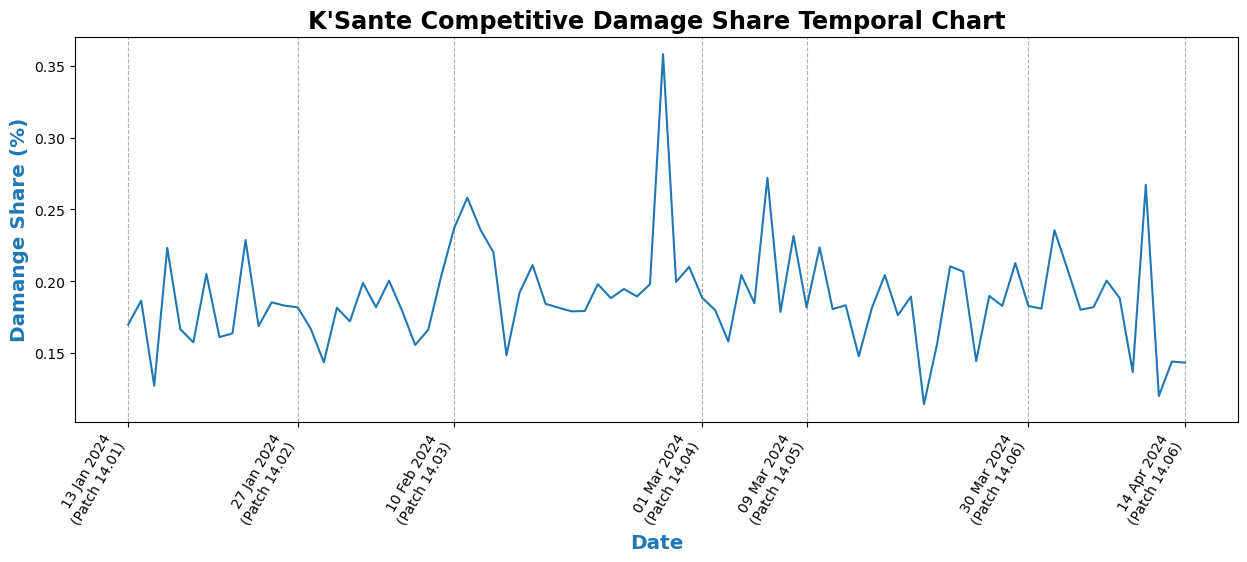

In [178]:
# Plot the data (damageshare) using matplotlib. Date have interval and label for the start of each patch version.

plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(df_dmgshare_grouped)
plt.title("K'Sante Competitive Damage Share Temporal Chart", size='xx-large', fontweight = 'bold')
plt.xlabel('Date', color='tab:blue', size='x-large', fontweight = 'bold')
plt.ylabel('Damange Share (%)', color='tab:blue', size='x-large', fontweight = 'bold')
plt.xticks([0,13,25,44,52,69,81], ['13 Jan 2024\n(Patch 14.01)','27 Jan 2024\n(Patch 14.02)','10 Feb 2024\n(Patch 14.03)','01 Mar 2024\n(Patch 14.04)','09 Mar 2024\n(Patch 14.05)','30 Mar 2024\n(Patch 14.06)','14 Apr 2024\n(Patch 14.06)'] ,rotation=60, ha='right')
plt.grid(axis = 'x', linestyle = '--');

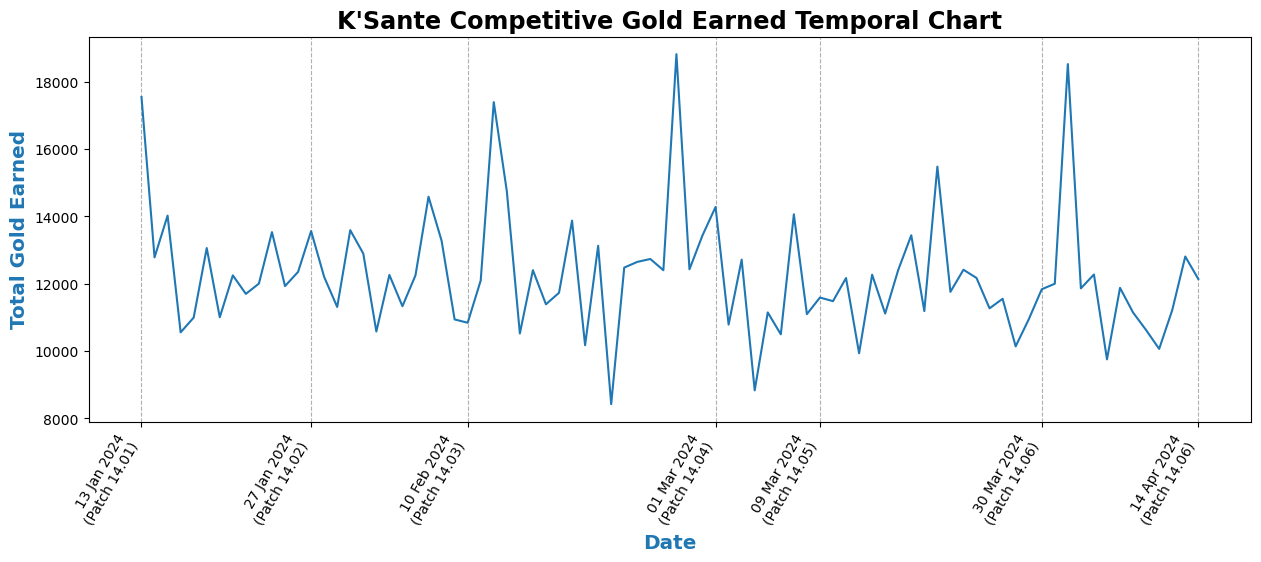

In [179]:
# Plot the data (totalgold) using matplotlib. Date have interval and label for the start of each patch version.

plt.figure(figsize=(15,5), dpi=100) 
    

plt.plot(df_gold_grouped)
plt.title("K'Sante Competitive Gold Earned Temporal Chart", size='xx-large', fontweight = 'bold')
plt.xlabel('Date', color='tab:blue', size='x-large', fontweight = 'bold')
plt.ylabel('Total Gold Earned', color='tab:blue', size='x-large', fontweight = 'bold')
plt.xticks([0,13,25,44,52,69,81], ['13 Jan 2024\n(Patch 14.01)','27 Jan 2024\n(Patch 14.02)','10 Feb 2024\n(Patch 14.03)','01 Mar 2024\n(Patch 14.04)','09 Mar 2024\n(Patch 14.05)','30 Mar 2024\n(Patch 14.06)','14 Apr 2024\n(Patch 14.06)'] ,rotation=60, ha='right')
plt.grid(axis = 'x', linestyle = '--');

## 5. Decomposition

In [180]:
# Reset index
df_dmgshare_reset = df_dmgshare_grouped.reset_index()
df_gold_reset = df_gold_grouped.reset_index()

In [181]:
# Check output for damageshare
df_dmgshare_reset

,date,damageshare
0,2024-01-13,0.169814
1,2024-01-14,0.186561
2,2024-01-15,0.127420
3,2024-01-17,0.223315
4,2024-01-18,0.166727
...,...,...
77,2024-04-07,0.136842
78,2024-04-08,0.267159
79,2024-04-11,0.120292
80,2024-04-13,0.144219


In [182]:
# Check output for totalgold
df_gold_reset

,date,totalgold
0,2024-01-13,17541.000000
1,2024-01-14,12782.000000
2,2024-01-15,14022.000000
3,2024-01-17,10556.000000
4,2024-01-18,10995.000000
...,...,...
77,2024-04-07,10623.500000
78,2024-04-08,10065.000000
79,2024-04-11,11215.000000
80,2024-04-13,12807.600000


In [183]:
# Checking column types for damageshare
df_dmgshare_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         82 non-null     object 
 1   damageshare  82 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [184]:
# Checking column types for totalgold
df_gold_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       82 non-null     object 
 1   totalgold  82 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [185]:
# Set the "Date" column as the index for damageshare

from datetime import datetime

df_dmgshare_reset['datetime'] = pd.to_datetime(df_dmgshare_reset['date']) # Create a datetime column from "Date.""
df_dmgshare_reset = df_dmgshare_reset.set_index('datetime') # Set the datetime as the index of the dataframe.
df_dmgshare_reset.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_dmgshare_reset.head()

,damageshare
datetime,
2024-01-13,0.169814
2024-01-14,0.186561
2024-01-15,0.127420
2024-01-17,0.223315
2024-01-18,0.166727


In [186]:
# Set the "Date" column as the index for totalgold

from datetime import datetime

df_gold_reset['datetime'] = pd.to_datetime(df_gold_reset['date']) # Create a datetime column from "Date.""
df_gold_reset = df_gold_reset.set_index('datetime') # Set the datetime as the index of the dataframe.
df_gold_reset.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_gold_reset.head()

,totalgold
datetime,
2024-01-13,17541.0
2024-01-14,12782.0
2024-01-15,14022.0
2024-01-17,10556.0
2024-01-18,10995.0


In [189]:
# Decompose the time series using an additive model

decomposition_dmgshare = sm.tsa.seasonal_decompose(df_dmgshare_reset, model='additive',period=1)
decomposition_gold = sm.tsa.seasonal_decompose(df_gold_reset, model='additive',period=1)

In [190]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

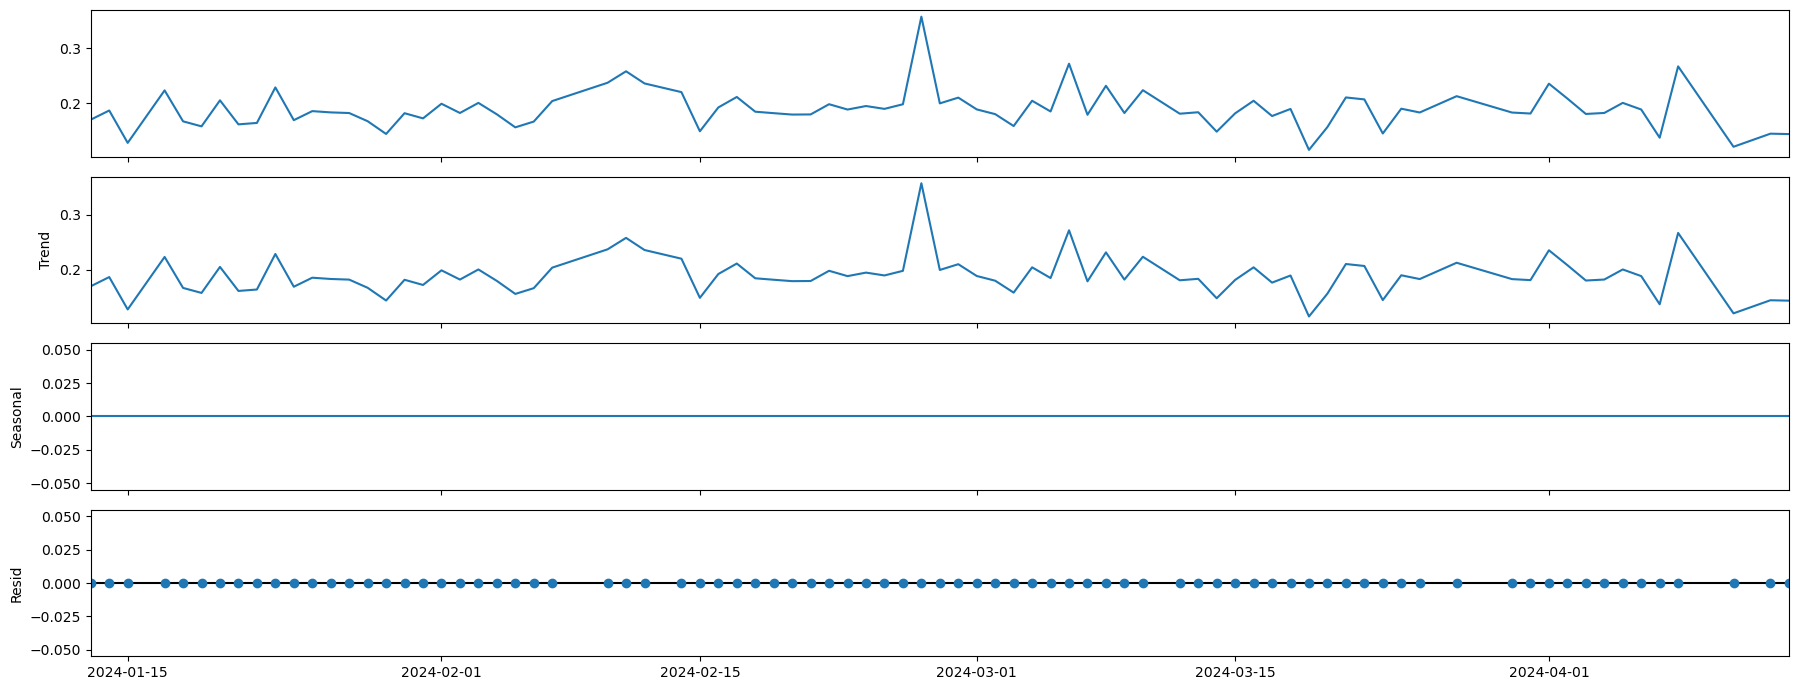

In [191]:
# Plot the separate components for damageshare

decomposition_dmgshare.plot()
plt.show()

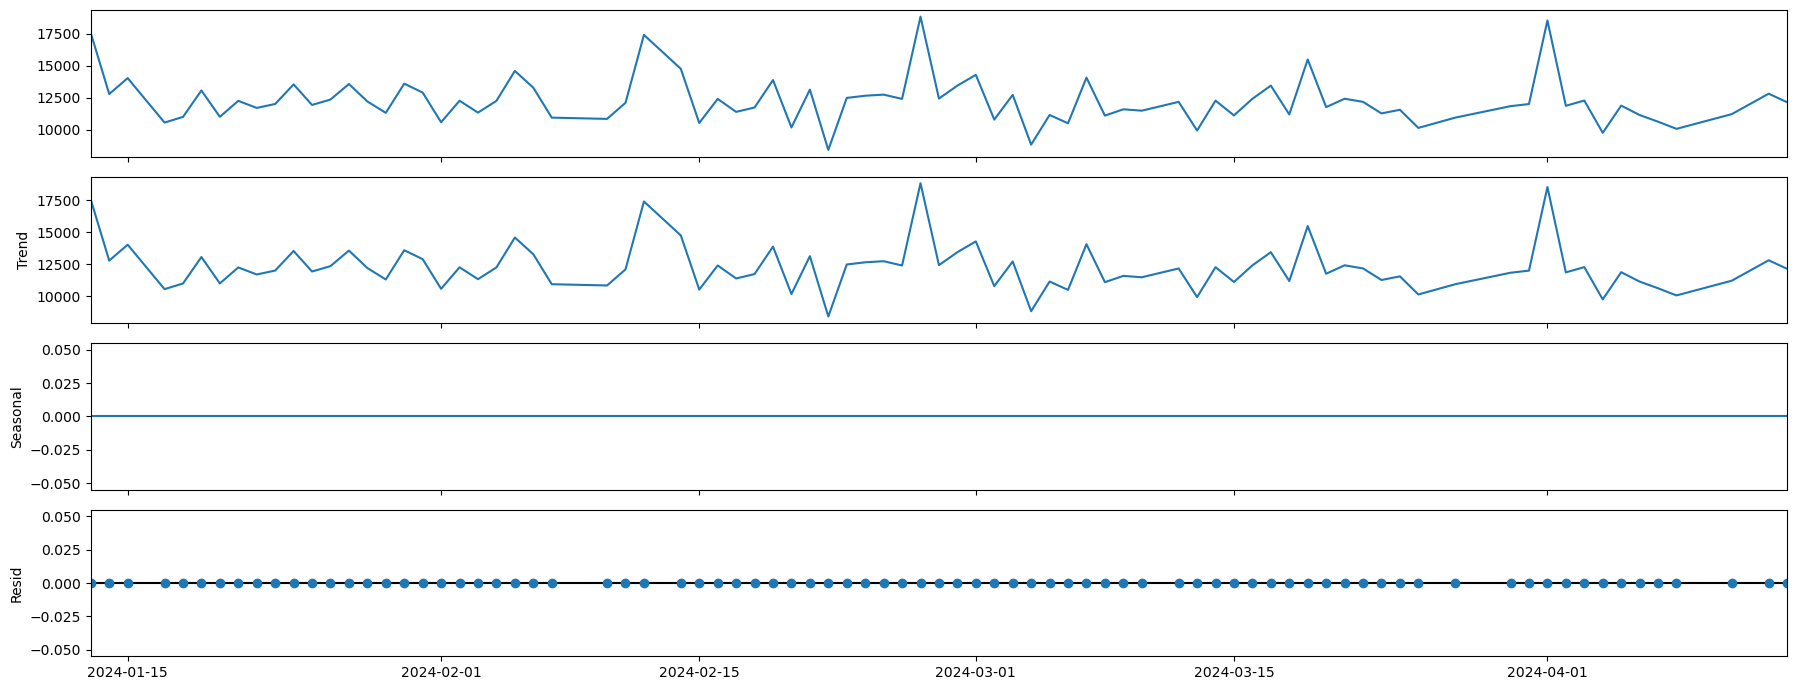

In [192]:
# Plot the separate components for totalgold

decomposition_gold.plot()
plt.show()

### Observations:
#### Seems like the decomposition does not contains any seasonality or noise for both damageshare and gold chart.

## 6. Testing for stationarity

In [193]:
# Testing for stationarity for damageshare
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_dmgshare_reset['damageshare'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.501099e+00
p-value                        1.237700e-13
Number of Lags Used            0.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64


In [194]:
# Testing for stationarity for totalgold
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_gold_reset['totalgold'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.219718e+00
p-value                        1.793583e-15
Number of Lags Used            0.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64


### Result Interpretation:
#### Damage share - Since the test statistic (-8.501) is smaller than the critical value of 1%/5%/10% (-3.514, -2.898, -2.586), we can consider my series to be stationary. It also have a statisfactory p-value(1.237700e-13) of below 0.05.

#### Total gold - Since the test statistic (-9.219) is smaller than the critical value of 1%/5%/10% (-3.514, -2.898, -2.586), we can consider my series to be stationary. It also have a statisfactory p-value(1.793583e-15) of below 0.05.

## 7. Checking for autocorrelation

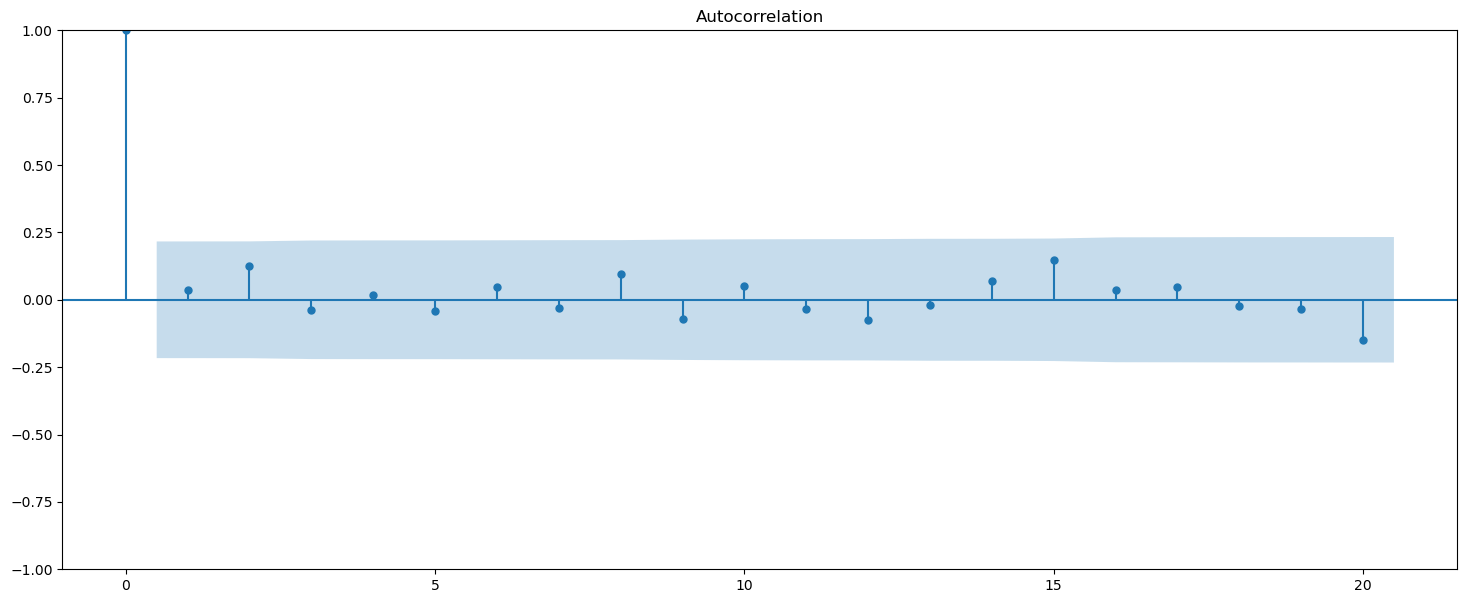

In [195]:
# Check out a plot of autocorrelations for damageshare

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_dmgshare_reset)
plt.show()

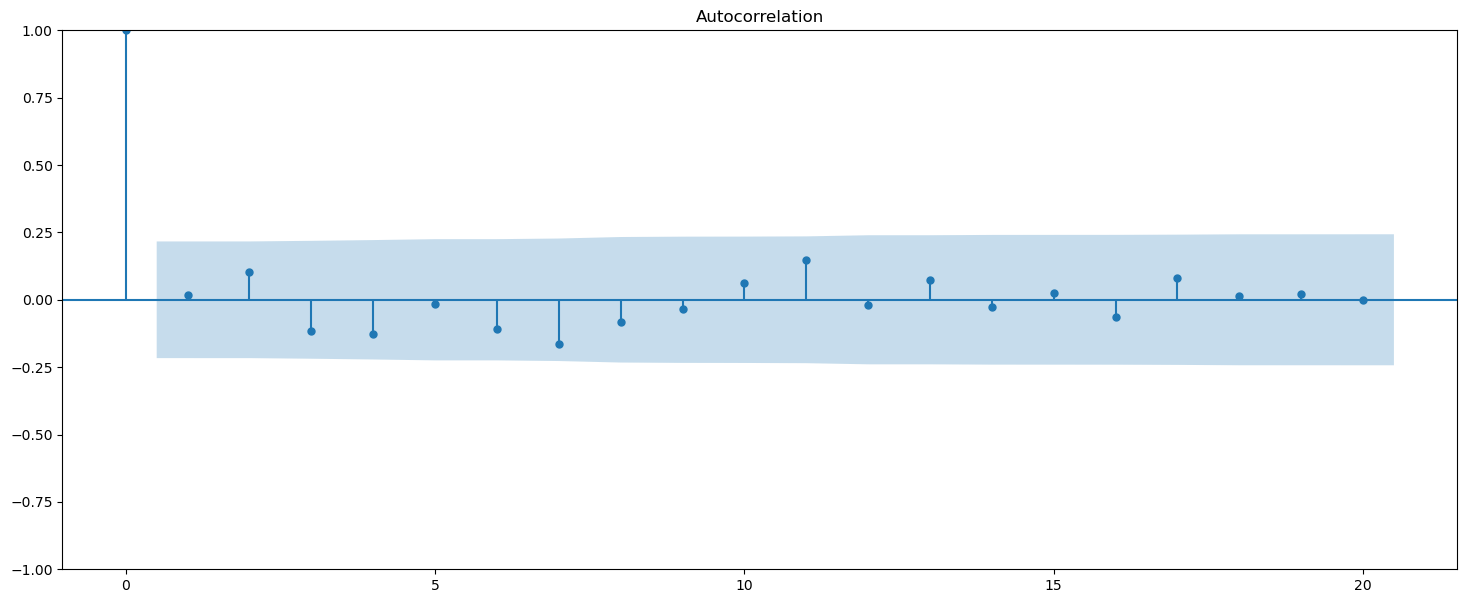

In [196]:
# Check out a plot of autocorrelations for totalgold

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_gold_reset)
plt.show()

### Result Interpretation:
#### Since most of the lines for both the damageshare chart and the totalgold chart is within the blue edge of the confidence interval, it means there are no lags that are correlated with each other, thus i can deduce that my data is non-stationary.